In [56]:
import numpy as np
import matplotlib.pyplot as plt 

def apply_filter(fc,Marvin):

    # Creation of window
    w = np.ones(Marvin.shape)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            r2 = (i-511/2)**2 + (j-511/2)**2
            if r2 > fc**2:
                w[i,j] = 0

    Marvin_filtered = Marvin*w  
    # Appliying filter on marvin 2d fft
    return (Marvin_filtered,w)


Text(0, 0.5, 'y (i)')

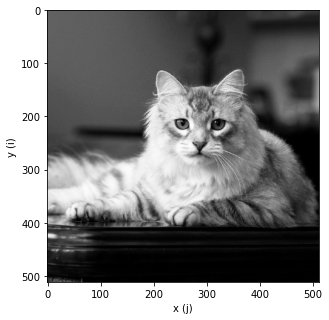

In [57]:
# Loading tiff image with matplotlib into a numpy array (requires Pillow)
marvin = plt.imread('marvin_clean.png')

plt.figure(figsize=[10, 5])
# Show color image
plt.imshow(marvin, cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')


Text(0.5, 1.0, 'marvin 2d fft')

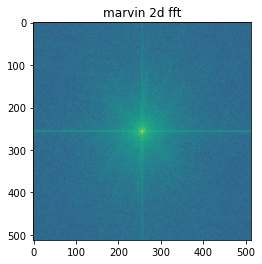

In [58]:
# Compute and shift fft2
Marvin = np.fft.fft2(marvin) # compute fft2
Marvin = np.fft.fftshift(Marvin) # shift fft2

# plot results
plt.imshow(np.log(np.abs(Marvin)))
plt.title('marvin 2d fft')

Text(0.5, 1.0, 'Filtered marvin 2d fft')

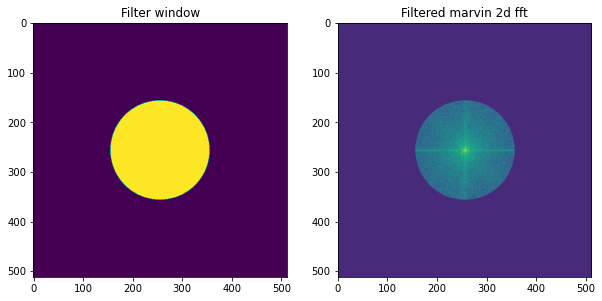

In [59]:
fc=100
Marvin_filtered,w=apply_filter(fc,Marvin)

# plot results
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(w)
plt.title('Filter window')

plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(Marvin))*w)
plt.title('Filtered marvin 2d fft')

Text(0, 0.5, 'y (i)')

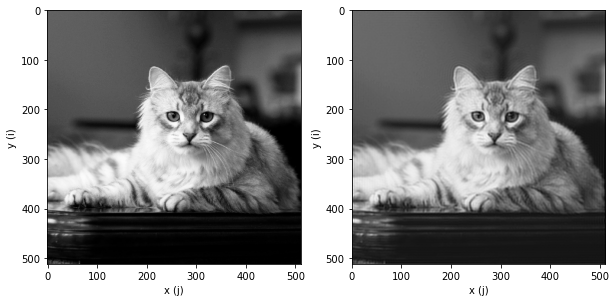

In [60]:
marvin_filtered=np.fft.ifft2(np.fft.ifftshift(Marvin_filtered)).real
plt.figure(figsize=[10, 5])
# Show color image
plt.subplot(1,2,1)
plt.imshow(marvin, cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')

# Show greyscale image
plt.subplot(1,2,2)
plt.imshow(marvin_filtered, cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')



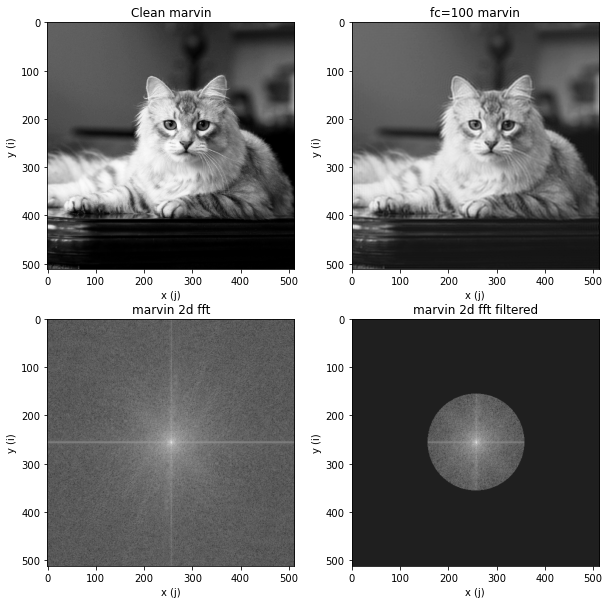

In [61]:
plt.figure(figsize=[10, 10])
plt.subplot(2,2,1)
plt.imshow(marvin, cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')
plt.title("Clean marvin")
# Show greyscale image
plt.subplot(2,2,2)
plt.imshow(marvin_filtered, cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')
plt.title(f"fc={fc} marvin")

plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(Marvin)), cmap='gray')
plt.xlabel('x (j)')
plt.ylabel('y (i)')
plt.title("marvin 2d fft")

plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(Marvin))*w, cmap="gray")
plt.xlabel('x (j)')
plt.ylabel('y (i)')
plt.title('marvin 2d fft filtered')
plt.savefig(f"marvin_pictures/marvin_fc{fc}_Quad_graph.png")